<a href="https://colab.research.google.com/github/ringolove/daegu-ai-2th-dl1/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 판다스로 데이터 확인
- 레모네이드: https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/lemonade.csv
- 보스턴: https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv
- 아이리스: https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv

In [ ]:
import pandas as pd

path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/lemonade.csv"
lemon = pd.read_csv(path)
print(lemon.shape)
lemon.head()

(6, 2)


,온도,판매량
0,20,40
1,21,42
2,22,44
3,23,46
4,24,48


In [ ]:
독립 = lemon[['온도']]
종속 = lemon[['판매량']]
print(독립.shape, 종속.shape)
print(독립.head(2))
print(종속.head(2))

(6, 1) (6, 1)
   온도
0  20
1  21
   판매량
0   40
1   42


In [ ]:
import pandas as pd

path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv"
boston = pd.read_csv(path)
print(boston.shape)
boston.head()

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
print(boston.columns)
독립 = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 
               'tax', 'ptratio', 'b', 'lstat']]
종속 = boston[['medv']]
print(독립.shape, 종속.shape)
print(독립.head(2))
print(종속.head(2))

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
(506, 13) (506, 1)
      crim    zn  indus  chas    nox  ...  rad  tax  ptratio      b  lstat
0  0.00632  18.0   2.31     0  0.538  ...    1  296     15.3  396.9   4.98
1  0.02731   0.0   7.07     0  0.469  ...    2  242     17.8  396.9   9.14

[2 rows x 13 columns]
   medv
0  24.0
1  21.6


In [ ]:
import pandas as pd

path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv"
iris = pd.read_csv(path)
print(iris.shape)
iris.head()

(150, 5)


,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 첫번째 딥러닝 - 레모네이드 판매 예측

- https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/lemonade.csv

In [ ]:
import tensorflow as tf
import pandas as pd

# 데이터 준비
path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/lemonade.csv"
lemon = pd.read_csv(path)

x_lemon = lemon[['온도']]
y_lemon = lemon[['판매량']]
print(x_lemon.shape, y_lemon.shape)

(6, 1) (6, 1)


In [ ]:
# 모델 생성
X = tf.keras.layers.Input(shape=[1])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss="mse")

In [ ]:
# 모델에 데이터 학습
model.fit(x_lemon, y_lemon, epochs=1000, verbose=0)
model.fit(x_lemon, y_lemon, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 6ms/step - loss: 5.9560e-04
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 5.9516e-04
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 5.9475e-04
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 5.9437e-04
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 5.9396e-04
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 5.9360e-04
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 5.9324e-04
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 5.9286e-04
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 5.9248e-04
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 5.9212e-04


In [ ]:
# 모델 이용
model.predict(x_lemon)

array([[40.022118],
       [42.00919 ],
       [43.996258],
       [45.98333 ],
       [47.9704  ],
       [49.95747 ]], dtype=float32)

In [ ]:
model.get_weights()

[array([[1.9870703]], dtype=float32), array([0.28071314], dtype=float32)]

In [ ]:
온도 = 20
판매량 = 1.9870703 * 온도 + 0.28071314
판매량

40.02211914

## 두번째 딥러닝 - 보스턴 집값 예측
- https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv

In [ ]:
import pandas as pd
import tensorflow as tf

# 데이터 준비
path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv"
boston = pd.read_csv(path)
print(boston.columns)

x_boston = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']]

y_boston = boston[['medv']]
print(x_boston.shape, y_boston.shape)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
(506, 13) (506, 1)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


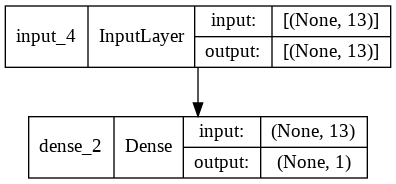

In [ ]:
# 모델 생성
X = tf.keras.layers.Input(shape=[13])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss="mse")

model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# 모델에 데이터 학습
model.fit(x_boston, y_boston, epochs=1000, verbose=0)
model.fit(x_boston, y_boston, epochs=10)

Epoch 1/10
16/16 [==============================] - 0s 1ms/step - loss: 24.1248
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 24.5402
Epoch 3/10
16/16 [==============================] - 0s 1ms/step - loss: 24.0478
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 24.1700
Epoch 5/10
16/16 [==============================] - 0s 1ms/step - loss: 24.4346
Epoch 6/10
16/16 [==============================] - 0s 1ms/step - loss: 24.4059
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 24.8140
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 24.5571
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 24.2357
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 24.0571


In [ ]:
# 모델 이용
model.predict(x_boston[:5])

array([[29.64109 ],
       [24.344156],
       [30.93721 ],
       [29.750265],
       [29.348034]], dtype=float32)

In [ ]:
# model.predict([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]) 새로운 값을 넣어줄 경우 대괄호 2개(dataframe)

In [ ]:
model.get_weights()

[array([[-0.09295926],
        [ 0.04953612],
        [-0.03375108],
        [ 2.6689477 ],
        [ 0.85469836],
        [ 5.3469906 ],
        [-0.01220692],
        [-1.0050198 ],
        [ 0.18531793],
        [-0.01133422],
        [-0.45649588],
        [ 0.01313996],
        [-0.46232322]], dtype=float32), array([5.0272164], dtype=float32)]

## 세번째 딥러닝 아이리스 품종 분류
- https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv

In [ ]:
import tensorflow as tf
import pandas as pd

path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv"
iris = pd.read_csv(path)
iris = pd.get_dummies(iris)
print(iris.columns)

x_iris = iris[['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭']]
y_iris = iris[['품종_setosa', '품종_versicolor', '품종_virginica']]

print(x_iris.shape, y_iris.shape)
print(x_iris.head(1))
print(y_iris.head(1))

Index(['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭', '품종_setosa', '품종_versicolor',
       '품종_virginica'],
      dtype='object')
(150, 4) (150, 3)
   꽃잎길이  꽃잎폭  꽃받침길이  꽃받침폭
0   5.1  3.5    1.4   0.2
   품종_setosa  품종_versicolor  품종_virginica
0          1              0             0


In [ ]:
# 모델 준비
X = tf.keras.layers.Input(shape=[4])
Y = tf.keras.layers.Dense(3, activation="softmax")(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss="categorical_crossentropy", metrics="accuracy")

In [ ]:

model.fit(x_iris, y_iris, epochs=2000, verbose=0)
model.fit(x_iris, y_iris, epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0944 - accuracy: 0.9667
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0938 - accuracy: 0.9667
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0940 - accuracy: 0.9667
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9667
Epoch 5/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0935 - accuracy: 0.9667
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.9667
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0939 - accuracy: 0.9667
Epoch 8/10
5/5 [==============================] - 0s 4ms/step - loss: 0.0935 - accuracy: 0.9667
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0938 - accuracy: 0.9667
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0938 - accuracy: 0.9667


In [ ]:
sample = x_iris.sample(5)
sample

,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭
133,6.3,2.8,5.1,1.5
21,5.1,3.7,1.5,0.4
140,6.7,3.1,5.6,2.4
35,5.0,3.2,1.2,0.2
83,6.0,2.7,5.1,1.6


In [ ]:
pred = model.predict(sample)
pred

array([[3.2541632e-08, 5.7663447e-01, 4.2336556e-01],
       [9.9997413e-01, 2.5877005e-05, 3.6105210e-12],
       [2.4893065e-12, 7.5549060e-03, 9.9244505e-01],
       [9.9998283e-01, 1.7174121e-05, 1.8379586e-12],
       [5.0565081e-09, 2.7981293e-01, 7.2018707e-01]], dtype=float32)

In [ ]:
y_iris.loc[sample.index, :]

,품종_setosa,품종_versicolor,품종_virginica
133,0,0,1
21,1,0,0
140,0,0,1
35,1,0,0
83,0,1,0


In [ ]:
model.get_weights()

[array([[ 0.912189  , -0.0484387 , -1.2202494 ],
        [ 5.3854117 ,  1.3134394 , -1.6170163 ],
        [-5.5282416 , -0.01066993,  2.0830235 ],
        [-6.829299  , -2.3956156 ,  3.7021174 ]], dtype=float32),
 array([ 2.794644 ,  2.1481812, -2.397544 ], dtype=float32)]

## 네번째 딥러닝 히든레이어 
- https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv
- https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv

In [ ]:
# 데이터 준비
import pandas as pd
import tensorflow as tf

boston = pd.read_csv("https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv")
print(boston.columns)
x_boston = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']]
y_boston = boston[['medv']]
print(x_boston.shape, y_boston.shape)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
(506, 13) (506, 1)


In [ ]:
# 모델 준비
X = tf.keras.layers.Input(shape=[13])
H = tf.keras.layers.Dense(5, activation='swish')(X)
H = tf.keras.layers.Dense(5, activation='swish')(H)
H = tf.keras.layers.Dense(5, activation='swish')(H)
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_22 (Dense)            (None, 5)                 70        
                                                                 
 dense_23 (Dense)            (None, 5)                 30        
                                                                 
 dense_24 (Dense)            (None, 5)                 30        
                                                                 
 dense_25 (Dense)            (None, 1)                 6         
                                                                 
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델을 데이터로 학습
model.fit(x_boston, y_boston, epochs=5000, verbose=0)
model.fit(x_boston, y_boston, epochs=10)

Epoch 1/10
16/16 [==============================] - 0s 2ms/step - loss: 17.0633
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 17.8323
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 17.6212
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 17.1473
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 17.2441
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 17.2634
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 18.1767
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 17.3598
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 16.9645
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 17.2490


### 아이리스 인공신경망

In [ ]:
import pandas as pd
import tensorflow as tf

# 데이터 준비
iris = pd.read_csv("https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv")
iris = pd.get_dummies(iris)
print(iris.columns)

x_iris = iris[['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭']]
y_iris = iris[['품종_setosa', '품종_versicolor', '품종_virginica']]
print(x_iris.shape, y_iris.shape)

Index(['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭', '품종_setosa', '품종_versicolor',
       '품종_virginica'],
      dtype='object')
(150, 4) (150, 3)


In [ ]:
# 모델을 생성합니다. 
X = tf.keras.layers.Input(shape=[4])
H = tf.keras.layers.Dense(8, activation='swish')(X)
H = tf.keras.layers.Dense(8, activation='swish')(H)
H = tf.keras.layers.Dense(8, activation='swish')(H)
Y = tf.keras.layers.Dense(3, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 4)]               0         
                                                                 
 dense_40 (Dense)            (None, 8)                 40        
                                                                 
 dense_41 (Dense)            (None, 8)                 72        
                                                                 
 dense_42 (Dense)            (None, 8)                 72        
                                                                 
 dense_43 (Dense)            (None, 3)                 27        
                                                                 
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_iris, y_iris, epochs=1000, verbose=0)
model.fit(x_iris, y_iris, epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 4ms/step - loss: 0.0480 - accuracy: 0.9733
Epoch 2/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.9867
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0454 - accuracy: 0.9800
Epoch 4/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0507 - accuracy: 0.9800
Epoch 5/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9733
Epoch 6/10
5/5 [==============================] - 0s 5ms/step - loss: 0.0480 - accuracy: 0.9867
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9800
Epoch 8/10
5/5 [==============================] - 0s 4ms/step - loss: 0.0411 - accuracy: 0.9800
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9867
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9800


##딥러닝 예제

In [ ]:
import tensorflow as tf

x_train = [[0, 0],
           [0, 1],
           [1, 0],
           [1, 1]]
y_train = [[0, 0],
           [0, 1],
           [0, 1],
           [1, 1]]

In [ ]:
X = tf.keras.layers.Input(shape=[2])
H = tf.keras.layers.Dense(8, activation="swish")(X)
H = tf.keras.layers.Dense(8, activation="swish")(H)
H = tf.keras.layers.Dense(8, activation="swish")(H)
Y = tf.keras.layers.Dense(2, activation="sigmoid")(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss="binary_crossentropy", metrics="accuracy")

In [ ]:
model.fit(x_train, y_train, epochs=3000, verbose=0)
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 7ms/step - loss: 1.0329e-08 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 1.0335e-08 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 1.0341e-08 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 1.0348e-08 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 1.0354e-08 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 1.0360e-08 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 1.0366e-08 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 1.0373e-08 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 1.0379e-08 - accuracy: 0.5000
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 1.0385e-08 - accuracy: 0.5000

In [ ]:
# 데이터 준비
x_input = [
    [1, 2],
    [1, 5],
    [2, 2],
    [2, 9],
    [3, 1],
    [3, 7],
    [4, 3],
    [4, 8],
    [5, 8],
    [5, 3],
    [6, 5],
    [6, 9],
    [7, 3],
    [7, 1],
    [8, 5],
    [8, 8],
    [9, 4],
    [9, 3],
]
y_label = [[sum(e)] for e in x_input]
y_label

[[3],
 [6],
 [4],
 [11],
 [4],
 [10],
 [7],
 [12],
 [13],
 [8],
 [11],
 [15],
 [10],
 [8],
 [13],
 [16],
 [13],
 [12]]

In [ ]:
X = tf.keras.layers.Input(shape=[2])
H = tf.keras.layers.Dense(8, activation="swish")(X)
H = tf.keras.layers.Dense(8, activation="swish")(H)
H = tf.keras.layers.Dense(8, activation="swish")(H)
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss="mse", metrics="accuracy")

In [ ]:
model.fit(x_input, y_label, epochs=1000, verbose=0)
model.fit(x_input, y_label, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 7ms/step - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 0.0000e+00

In [ ]:
model.predict([[100,100]])

array([[186.82504]], dtype=float32)